<a href="https://colab.research.google.com/github/lblogan14/opencv3_with_python/blob/master/ch2_edges_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/OpenCV3_with_Python_by_Example/data/ch2/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/OpenCV3_with_Python_by_Example/data/ch2


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#2D convolution
The kernel is called the image filter and the process of applying this kernel to the
given image is called image filtering.

In [0]:
img = cv2.imread('input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

In [0]:
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
kernel_5x5 = np.ones((5,5), np.float32) / 25.0

Text(0.5,1,'Original')

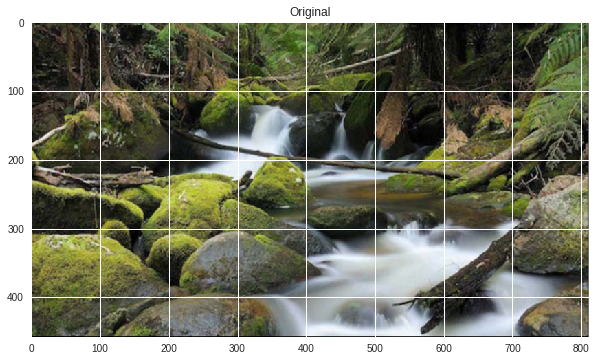

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.title('Original')
plt.axis('off')

Text(0.5,1,'Identity Filter')

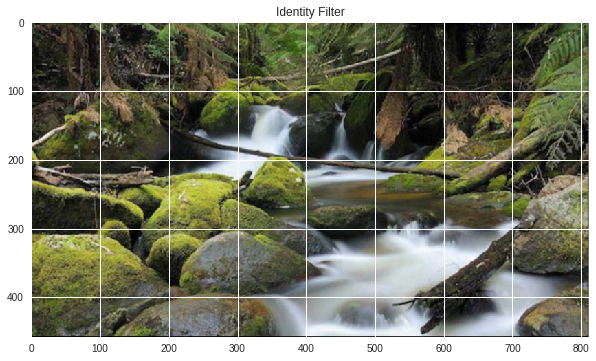

In [11]:
output = cv2.filter2D(img, -1, kernel_identity)
# value -1 is to maintain source image depth
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('Identity Filter')
plt.axis('off')

Text(0.5,1,'3x3 Filter')

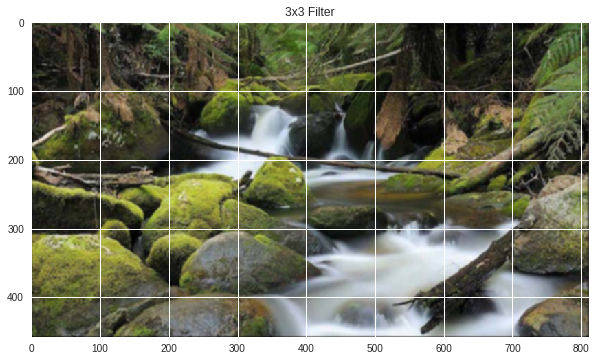

In [12]:
output = cv2.filter2D(img, -1, kernel_3x3)
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('3x3 Filter')
plt.axis('off')

Text(0.5,1,'5x5 Filter')

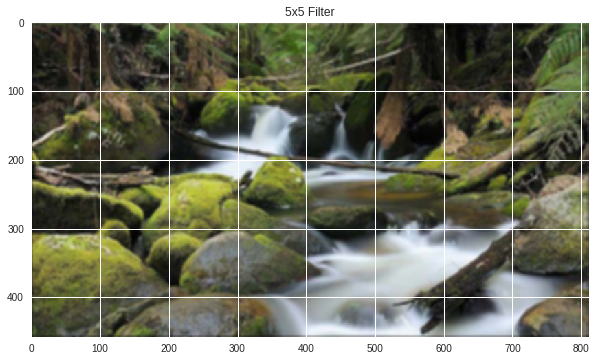

In [13]:
output = cv2.filter2D(img, -1, kernel_5x5)
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('5x5 Filter')
plt.axis('off')

#Blurring
known as **low pass filter**
A low pass filter is a filter that allows low frequencies, and blocks higher
frequencies. The frequency in an image refers to the rate of change of pixel values. So the sharp edges would be high-frequency content because the pixel values change rapidly in that region, and the plain areas would be low-frequency
content. Going by this definition, a low pass filter would try to smooth the edges.

A simple way to build a low pass filter is by uniformly averaging the values in the
neighborhood of a pixel.

In [0]:
img2 = cv2.imread('sign_input.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
rows, cols = img2.shape[:2]

kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_4x4 = np.ones((4,4), np.float32) / 16.0
kernel_6x6 = np.ones((6,6), np.float32) / 36.0

Text(0.5,1,'Original')

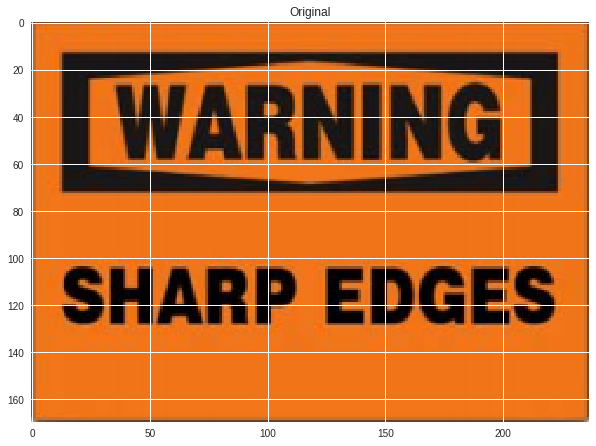

In [24]:
plt.figure(figsize=(10,8))
plt.imshow(img2)
plt.title('Original')
plt.axis('off')

Text(0.5,1,'Identity Filter')

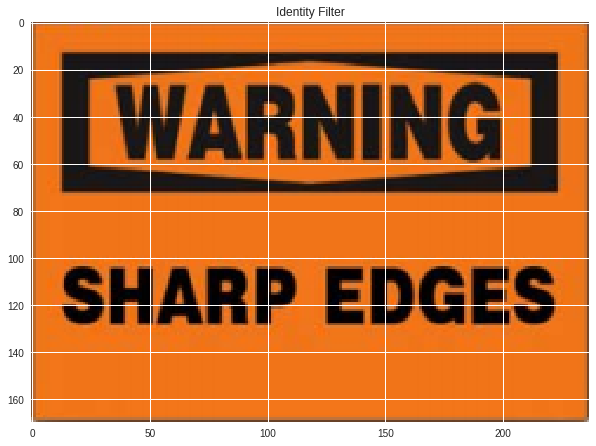

In [25]:
output = cv2.filter2D(img2, -1, kernel_identity)
# value -1 is to maintain source image depth
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('Identity Filter')
plt.axis('off')

Text(0.5,1,'4x4 Filter')

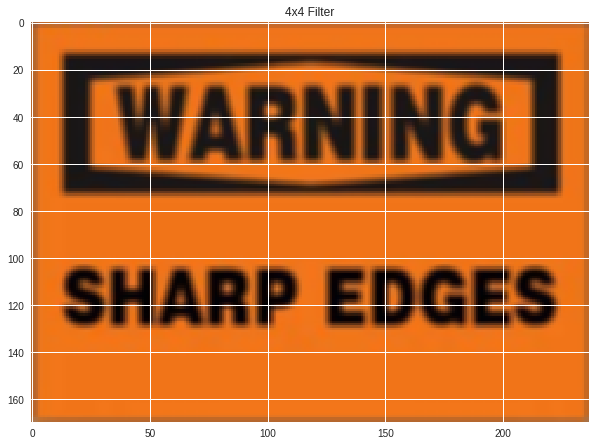

In [26]:
output = cv2.filter2D(img2, -1, kernel_4x4)
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('4x4 Filter')
plt.axis('off')

Text(0.5,1,'6x6 Filter')

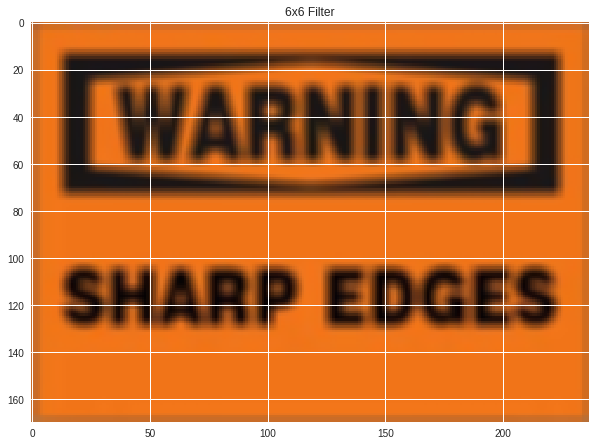

In [27]:
output = cv2.filter2D(img2, -1, kernel_6x6)
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('6x6 Filter')
plt.axis('off')

##Size of the kernel versus blurriness
In the previous examples, the `filter2D` function is applied to the input image. As the kernel size increases, the images get blurrier.

Another way to do this is to apply the `blur` function if you don't want to generate the kernels by yourself.

Text(0.5,1,'6x6 Filter')

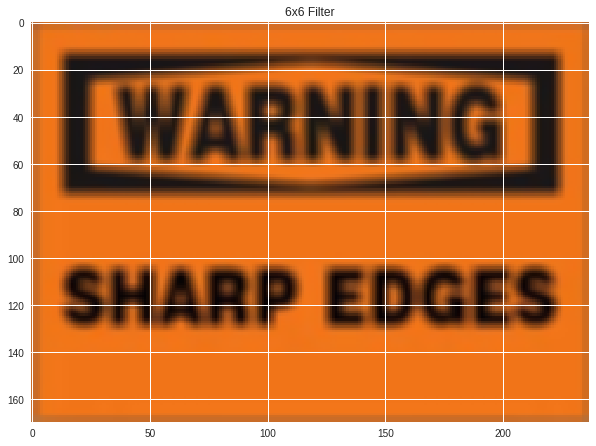

In [30]:
output = cv2.blur(img2, (6,6))
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('6x6 Filter')
plt.axis('off')

#Motion blur
When we apply the motion blurring effect, it will look like you captured the picture while
moving in a particular direction

In [0]:
img3 = cv2.imread('tree_input.png')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

Text(0.5,1,'Original')

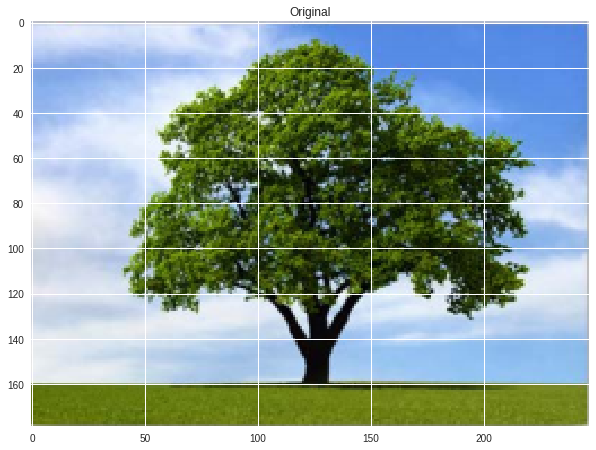

In [32]:
size = 15

# generate kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# apply kernel to input image
output = cv2.filter2D(img3, -1, kernel_motion_blur)

plt.figure(figsize=(10,8))
plt.imshow(img3)
plt.title('Original')
plt.axis('off')

Text(0.5,1,'Motion Blur')

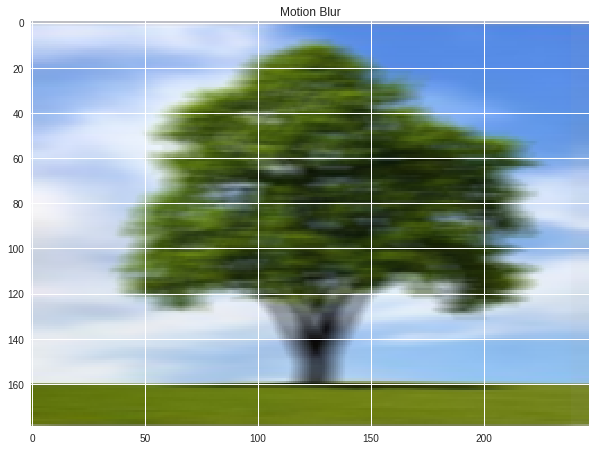

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('Motion Blur')
plt.axis('off')

The motion blur kernel averages the pixel values in a particular direction. It's like a directional low pass filter. 

For example, a 3x3 horizontal motion-blurring kernel will look like this,
$$M=\begin{bmatrix} 0 & 0 & 0 \\ 1 & 1 & 1 \\ 0 & 0 & 0 \end{bmatrix}$$
This will blur the image in a horizontal direction.

The example shown above applies a 15x15 kernel.

#Sharpening
Applying the sharpening filter will sharpen the edges in the image. This filter is very useful
when we want to enhance the edges of an image that's not crisp enough

In [0]:
# generate kernels
kernel_sharpen_1 = np.array([[-1,-1,-1], 
                             [-1,9,-1], 
                             [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1],
                             [1,-7,1],
                             [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1], 
                             [-1,2,8,2,-1], 
                             [-1,2,2,2,-1], 
                             [-1,-1,-1,-1,-1]]) / 8.0 

# apply kernels to input image
output_1 = cv2.filter2D(img3, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img3, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img3, -1, kernel_sharpen_3)

To just sharpen the image, we can apply a kernel like this,
$$M = \begin{bmatrix} -1 & -1 & -1 \\ -1 & 9 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$
and the result is shown below,

Text(0.5,1,'Sharpening')

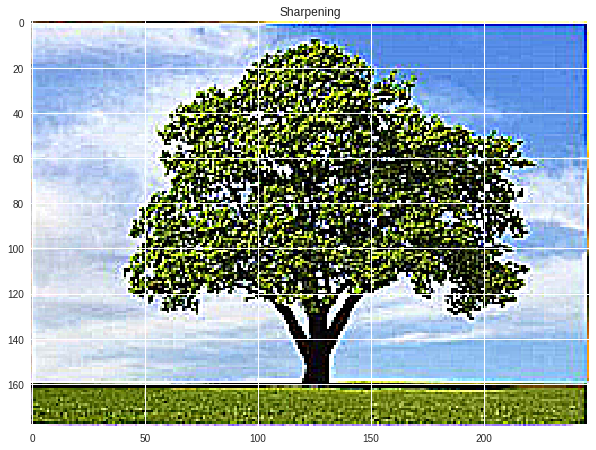

In [35]:
plt.figure(figsize=(10,8))
plt.imshow(output_1)
plt.title('Sharpening')
plt.axis('off')

To just excessively sharpen the image, we can apply a kernel like this,
$$M = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -7 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$
and the result is shown below,

Text(0.5,1,'Excessive Sharpening')

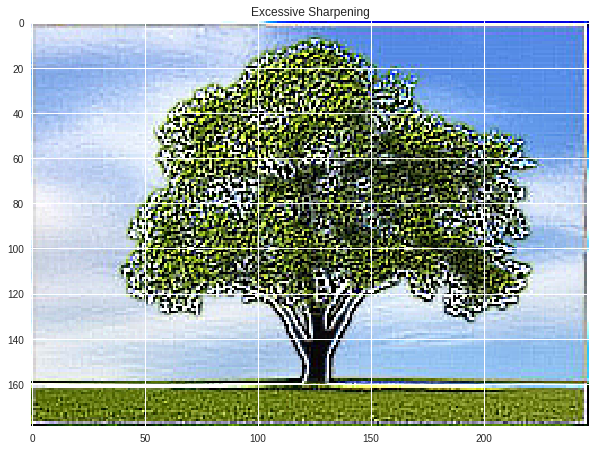

In [36]:
plt.figure(figsize=(10,8))
plt.imshow(output_2)
plt.title('Excessive Sharpening')
plt.axis('off')

If we want our images to look more natural, we would use an edge enhancement filter. The
underlying concept remains the same, but we use an approximate Gaussian kernel to build
this filter. It will help us smooth the image when we enhance the edges, thus making the
image look more natural.

To achievethis, we can apply a kernel like this,
$$M = \begin{bmatrix} -1 & -1 & -1 & -1 & -1\\ -1 & 2 & 2 & 2 & -1 \\ -1 & 2 & 8 & 2 & -1 \\  -1 & 2 & 2 & 2 & -1 \\ -1 & -1 & -1 & -1 & -1\end{bmatrix}$$
and the result is shown below,

Text(0.5,1,'Edge Enhancement')

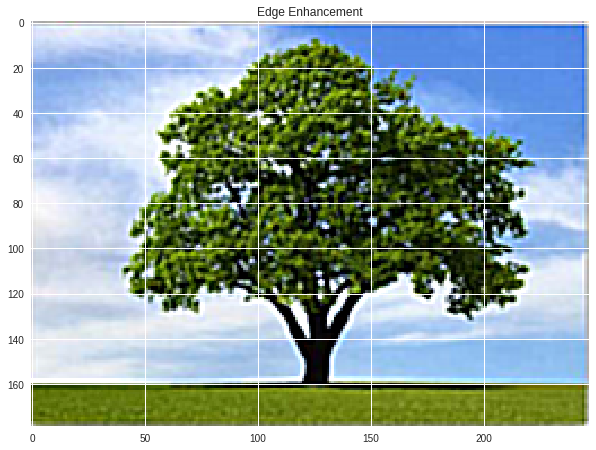

In [37]:
plt.figure(figsize=(10,8))
plt.imshow(output_3)
plt.title('Edge Enhancement')
plt.axis('off')

#Embossing
An embossing filter will take an image and convert it to an embossed image. Each pixel will be replaced with a shadow or a highlight.

Text(0.5,1,'Original')

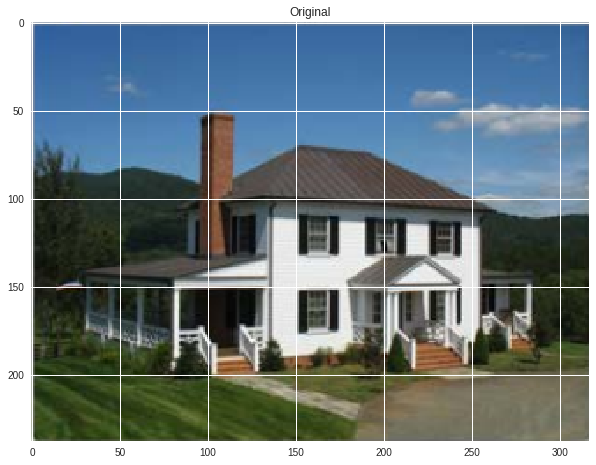

In [42]:
img4 = cv2.imread('house_input.png')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(img4)
plt.title('Original')
plt.axis('off')

In [0]:
# generate kernels
kernel_emboss_1 = np.array([[0,-1,-1],
                            [1,0,-1],
                            [1,1,0]])
kernel_emboss_2 = np.array([[-1,-1,0],
                            [-1,0,1],
                            [0,1,1]])
kernel_emboss_3 = np.array([[1,0,0],
                            [0,0,0],
                            [0,0,-1]])

# convert input image to grayscale
gray_img4 = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)

# apply kernels to grayscale image and add offset to produce the shadow
output_1 = cv2.filter2D(gray_img4, -1, kernel_emboss_1) + 128
output_2 = cv2.filter2D(gray_img4, -1, kernel_emboss_2) + 128
output_3 = cv2.filter2D(gray_img4, -1, kernel_emboss_3) + 128

Text(0.5,1,'Embossing - South West')

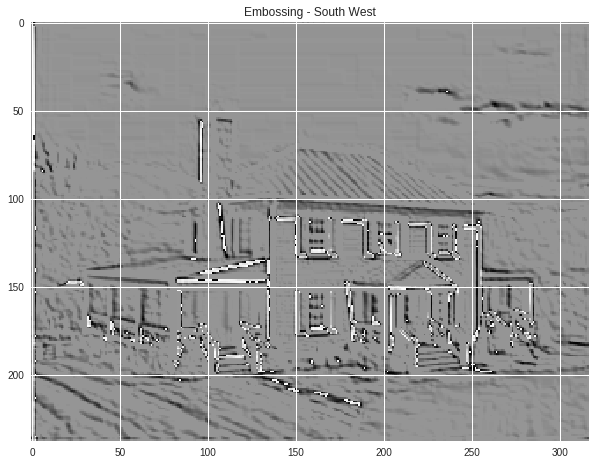

In [44]:
plt.figure(figsize=(10,8))
plt.imshow(output_1)
plt.title('Embossing - South West')
plt.axis('off')

Text(0.5,1,'Embossing - South East')

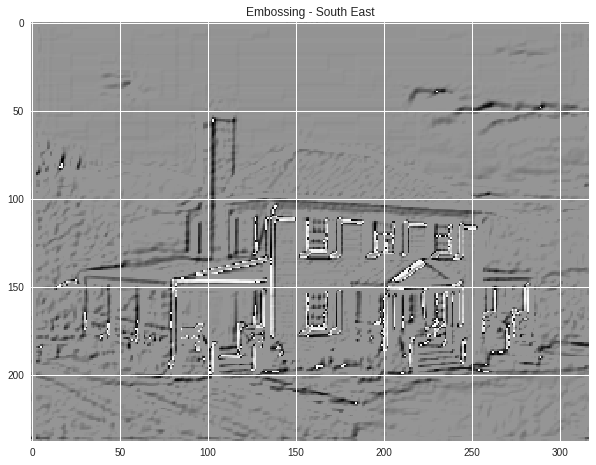

In [45]:
plt.figure(figsize=(10,8))
plt.imshow(output_2)
plt.title('Embossing - South East')
plt.axis('off')

Text(0.5,1,'Embossing - North West')

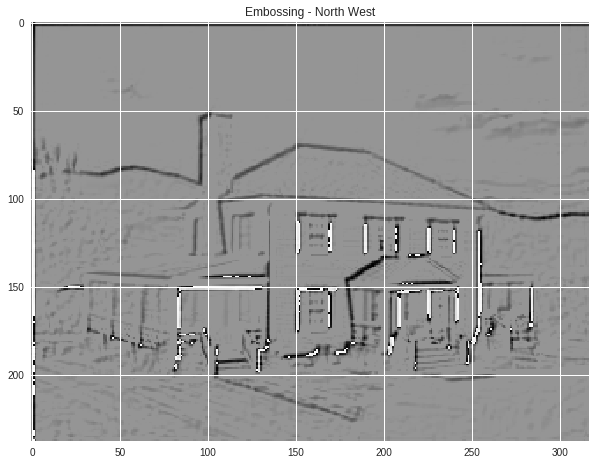

In [46]:
plt.figure(figsize=(10,8))
plt.imshow(output_3)
plt.title('Embossing - North West')
plt.axis('off')

The embossing effect is
achieved by offsetting all the pixel values in the image by `128`. This operation adds the
highlight/shadow effect to the picture.

#Edge detection
The process of edge detection involves detecting sharp edges in the image, and producing a
binary image as the output. Edge detection can be thought of as a high pass filtering operation.  A
high pass filter allows high-frequency content to pass through and blocks the low-frequency
content. As we discussed earlier, edges are high-frequency content. In edge detection, we
want to retain these edges and discard everything else. 

`Sobel` filter is composed of,
$$S_x=\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \quad\quad\quad 
S_y =\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 &0 \\ 1 & 2 & 1 \end{bmatrix}$$
$S_x$ detects horizontal edges and $S_y$ detects vertical edges

In [0]:
img5 = cv2.imread('geometrics_input.png', cv2.IMREAD_GRAYSCALE)
rows, cols = img5.shape

In [0]:
# it is used depth of cv2.CV_64F
sobel_horizontal = cv2.Sobel(img5, cv2.CV_64F, 1, 0, ksize=5)
# kernel size can be: 1, 3, 5, 7
sobel_vertical = cv2.Sobel(img5, cv2.CV_64F, 0, 1, ksize=5)

In the case of 8-bit input images, it will result in truncated derivatives, so depth
value `cv2.CV_16U` can be used instead. In case edges are not that well-defined the value
of kernel can be adjusted, minor to obtain thinner edges and major for the opposite purpose. 

(-0.5, 251.5, 204.5, -0.5)

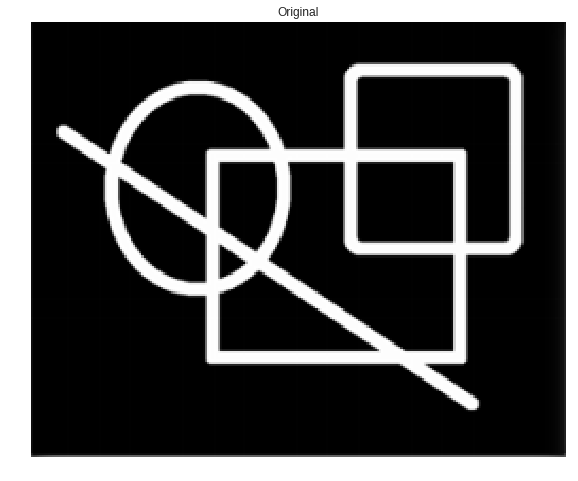

In [69]:
plt.figure(figsize=(10,8))
plt.imshow(img5)
plt.title('Original')
plt.axis('off')

(-0.5, 251.5, 204.5, -0.5)

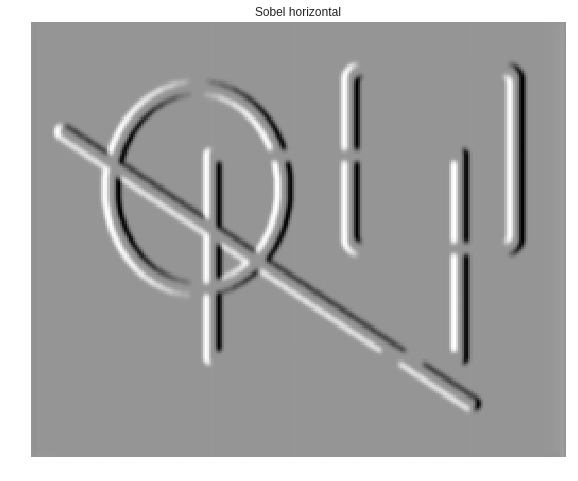

In [68]:
plt.figure(figsize=(10,8))
plt.imshow(sobel_horizontal)
plt.title('Sobel horizontal')
plt.axis('off')

(-0.5, 251.5, 204.5, -0.5)

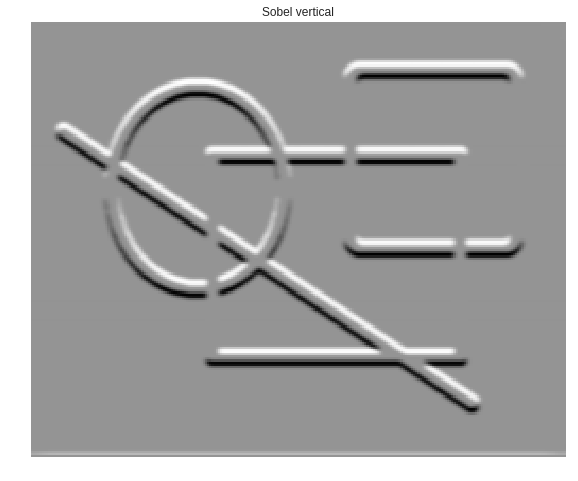

In [67]:
plt.figure(figsize=(10,8))
plt.imshow(sobel_vertical)
plt.title('Sobel vertical')
plt.axis('off')

`Laplacian` filter uses second derivative in both directions.

(-0.5, 251.5, 204.5, -0.5)

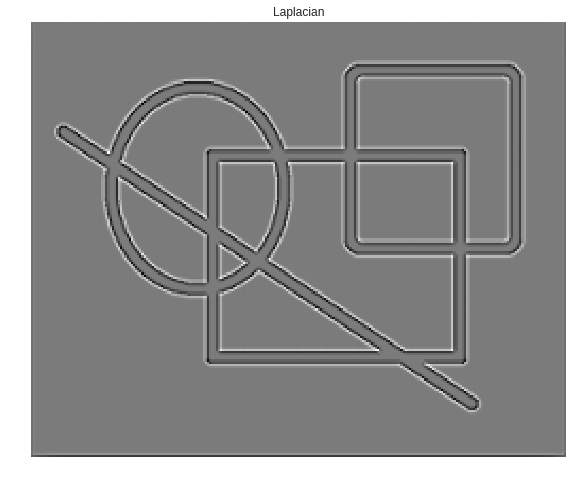

In [66]:
laplacian = cv2.Laplacian(img5, cv2.CV_64F)
plt.figure(figsize=(10,8))
plt.imshow(laplacian)
plt.title('Laplacian')
plt.axis('off')

`Laplacian` does not work well given too much noise in an image. In this case, try `Canny` edge detector,

In [0]:
img6 = cv2.imread('train_input.png', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img6, cv2.CV_64F)
canny = cv2.Canny(img6, 50, 240)

(-0.5, 317.5, 178.5, -0.5)

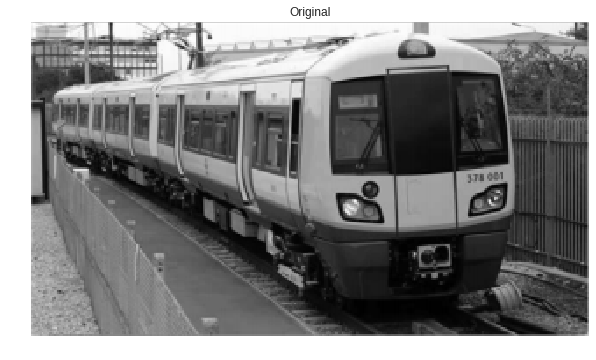

In [74]:
plt.figure(figsize=(10,8))
plt.imshow(img6, cmap='gray')
plt.title('Original')
plt.axis('off')

(-0.5, 317.5, 178.5, -0.5)

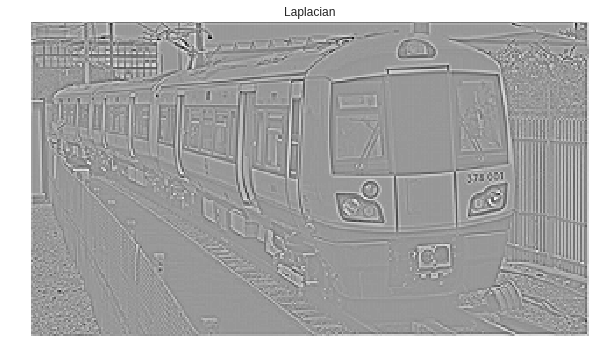

In [73]:
plt.figure(figsize=(10,8))
plt.imshow(laplacian)
plt.title('Laplacian')
plt.axis('off')

The Laplacian kernel gives rise to a noisy output, the edges are not specified much clearly shown in the image.

(-0.5, 317.5, 178.5, -0.5)

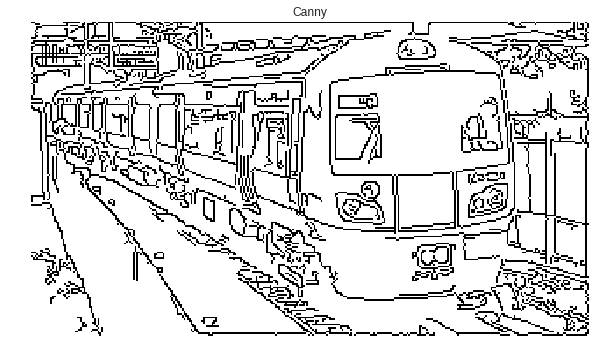

In [63]:
plt.figure(figsize=(10,8))
plt.imshow(canny)
plt.title('Canny')
plt.axis('off')

The `Canny` edge detector is much better. 

`Canny` takes two numbers as arguments to indicate the thresholds. The second argument is the **low threshold
value**, and the third argument is the **high threshold value**. If the gradient value is
beyond the high threshold value, it is marked as a strong edge. The `Canny` edge detector
starts tracking the edge from this point and continues the process until the gradient value
falls below the low threshold value. As you increase these thresholds, the weaker edges will
be ignored. The output image will be cleaner and sparser. 

#Erosion and dilation
Erosion and dilation are morphological image processing operations. Morphological image
processing basically deals with modifying geometric structures in the image. These
operations are primarily defined for binary images, but we can also use them on grayscale
images.

In [0]:
img7 = cv2.imread('text_input.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

In [0]:
img_erosion = cv2.erode(img7, kernel, iterations=1)
img_dilation = cv2.dilate(img7, kernel, iterations=1)

The third argument, `iterations`, determines how much you want to erode/dilate a given image. It applies the operation successively to the resultant image.

(-0.5, 392.5, 93.5, -0.5)

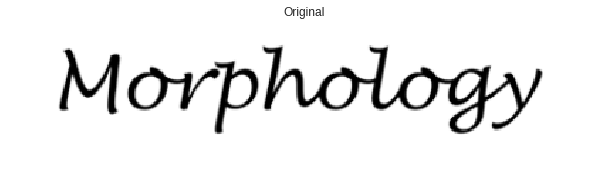

In [79]:
plt.figure(figsize=(10,8))
plt.imshow(img7)
plt.title('Original')
plt.axis('off')

(-0.5, 392.5, 93.5, -0.5)

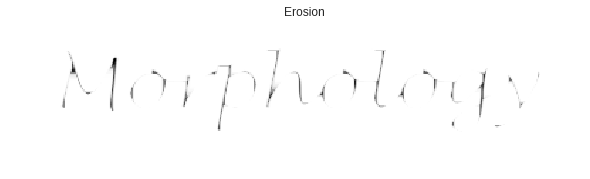

In [80]:
plt.figure(figsize=(10,8))
plt.imshow(img_erosion)
plt.title('Erosion')
plt.axis('off')

(-0.5, 392.5, 93.5, -0.5)

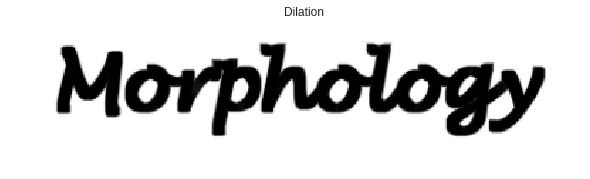

In [81]:
plt.figure(figsize=(10,8))
plt.imshow(img_dilation)
plt.title('Dilation')
plt.axis('off')

#Creating a vignette filter

In [0]:
img8 = cv2.imread('flower_input.png')
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
rows, cols = img8.shape[:2]

In [0]:
# generate vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols, 200)
kernel_y = cv2.getGaussianKernel(rows, 200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(img8)

# apply mask to each channel in the input image
for i in range(3):
  output[:,:,i] = output[:,:,i] * mask

(-0.5, 337.5, 337.5, -0.5)

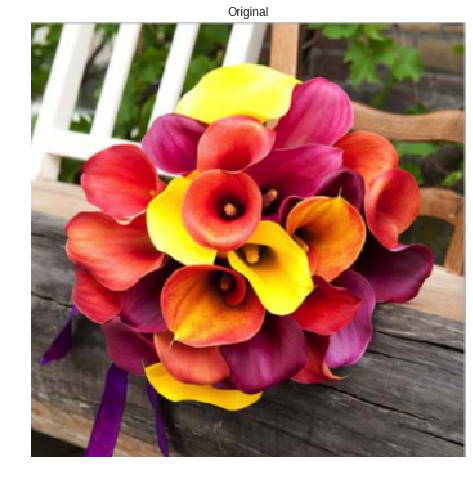

In [97]:
plt.figure(figsize=(10,8))
plt.imshow(img8)
plt.title('Original')
plt.axis('off')

(-0.5, 337.5, 337.5, -0.5)

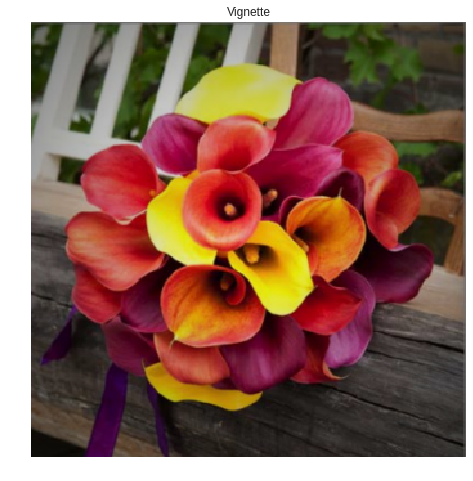

In [106]:
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('Vignette')
plt.axis('off')

The vignette filter basically focuses the brightness on a particular part of the image and the
other parts look faded. In order to achieve this, we need to filter out each channel in the
image using a Gaussian kernel, by `getGaussianKernel` function.

The second parameter of `getGaussianKernel` is the standard deviation of the Gaussian and controls the radius of the bright central region.

Once the 2D kernel is built, a mask is built by normalizing this kernel and scaling it up: \\
`mask = 255 * kernel/np.linalg.norm(kernel)` \\
This is an important step because if you don't scale it up, the image will look black. This
happens because all the pixel values will be close to zero after you superimpose the mask
on the input image.

To focus on a different region in the image,

In [0]:
# generating vignette mask using Gaussian kernels 
kernel_x = cv2.getGaussianKernel(int(1.5*cols),200) 
kernel_y = cv2.getGaussianKernel(int(1.5*rows),200) 
kernel = kernel_y * kernel_x.T 
mask = 255 * kernel / np.linalg.norm(kernel) 
mask = mask[int(0.5*rows):, int(0.5*cols):] 
output = np.copy(img8) 
 
# applying the mask to each channel in the input image 
for i in range(3): 
  output[:,:,i] = output[:,:,i] * mask 

All we need to do is build a bigger Gaussian kernel, and make sure that the peak coincides
with the region of interest.

(-0.5, 337.5, 337.5, -0.5)

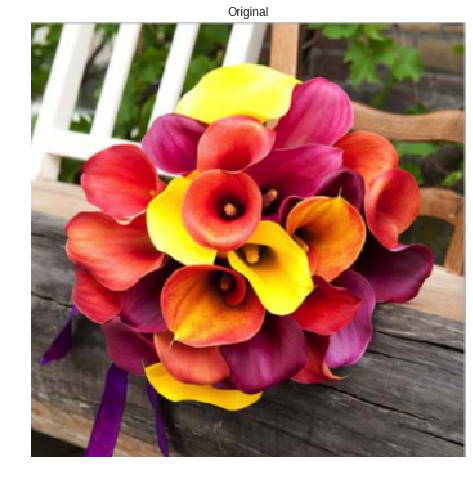

In [108]:
plt.figure(figsize=(10,8))
plt.imshow(img8)
plt.title('Original')
plt.axis('off')

(-0.5, 337.5, 337.5, -0.5)

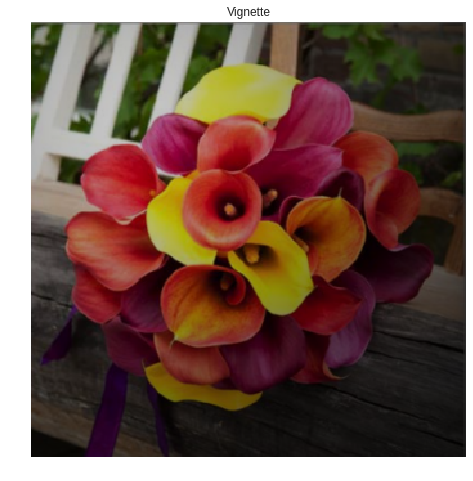

In [109]:
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('Vignette')
plt.axis('off')

#Enhance the contrast in an image
The pixel values tend to concentrate near zero when we capture the images in a low-light condition. When this happens, a lot of details in the image are not clearly visible to the human eye. Use the **histogram equalization** to enhance the contrast to capture the details.

(-0.5, 811.5, 457.5, -0.5)

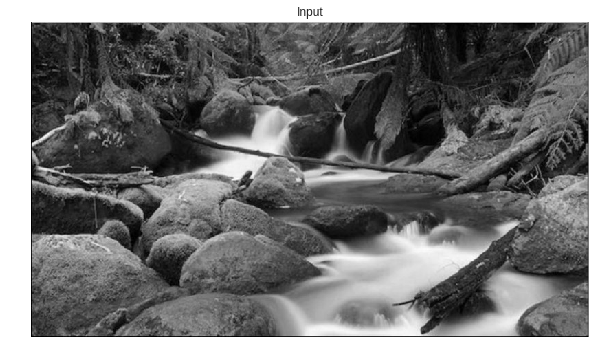

In [115]:
img = cv2.imread('input.jpg', 0)
plt.figure(figsize=(10,8))
plt.imshow(img, cmap='gray')
plt.title('Input')
plt.axis('off')

(-0.5, 811.5, 457.5, -0.5)

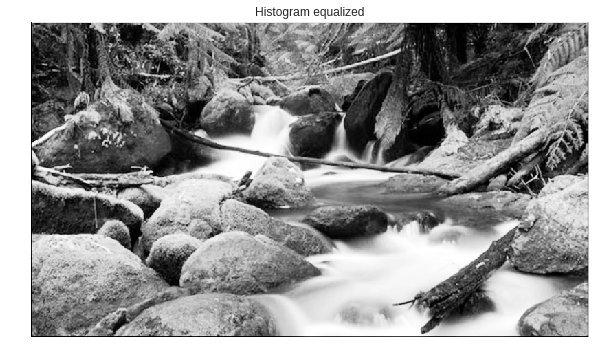

In [114]:
# equalize the histogram of input image
histeq = cv2.equalizeHist(img)

plt.figure(figsize=(10,8))
plt.imshow(histeq, cmap='gray')
plt.title('Histogram equalized')
plt.axis('off')

The  histogram equalization is that it's a nonlinear process. So, we cannot just separate out the three channels in an RGB image,
equalize the histogram separately, and combine them later to form the output image.

In order to handle the histogram equalization of color images, we need to convert it to a
color space, where intensity is separated from the color information. YUV would be a good choice because the YUV model defines a color space in terms of one **Luminance (Y)** and two **Chrominance (UV)** components. Once we convert it to YUV, we
just need to equalize the Y-channel and combine it with the other two channels to get the
output image.

In [0]:
img = cv2.imread('input.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# euqalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

(-0.5, 811.5, 457.5, -0.5)

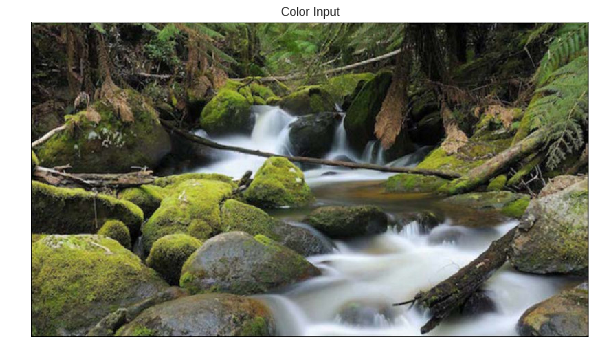

In [118]:
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title('Color Input')
plt.axis('off')

(-0.5, 811.5, 457.5, -0.5)

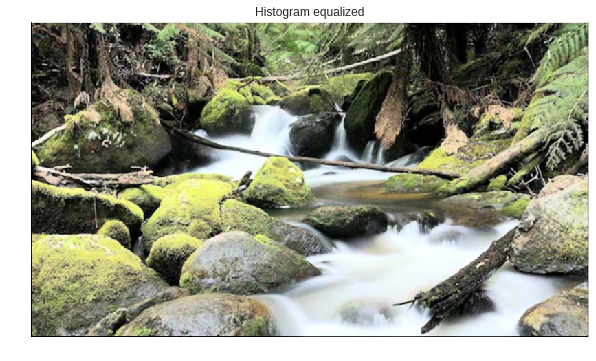

In [119]:
plt.figure(figsize=(10,8))
plt.imshow(img_output)
plt.title('Histogram equalized')
plt.axis('off')